## 이미지 처리 딥러닝
# 이미지 처리와 필터링

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 이미지 불러오기

In [3]:
car = plt.imread('car.jpg')
type(car), car.shape, car.dtype, car.max(), car.min()

(numpy.ndarray, (142, 308, 3), dtype('uint8'), 255, 0)

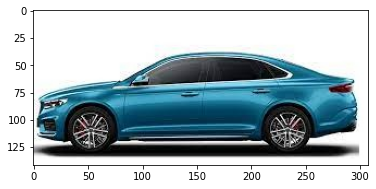

In [4]:
plt.imshow(car)

In [5]:
bob = plt.imread('bob_dylan.jpg')

In [6]:
type(bob), bob.shape, bob.dtype, bob.max(), bob.min()

(numpy.ndarray, (355, 355, 3), dtype('uint8'), 255, 0)

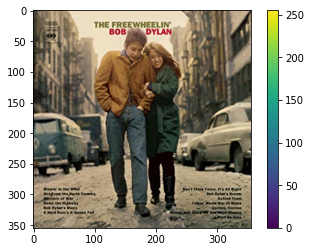

In [7]:
plt.imshow(bob)
plt.colorbar()

- 채널이 4개인 이미지도 있다 (4번째 채널은 투명도인 알파채널)

In [8]:
lucy = plt.imread('lucy.png')

In [9]:
type(lucy), lucy.shape, lucy.dtype, lucy.max(), lucy.min()

(numpy.ndarray, (186, 199, 4), dtype('float32'), 1.0, 0.0)

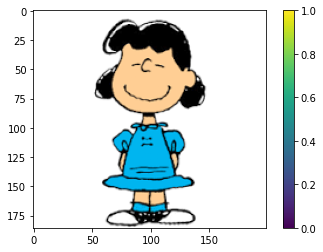

In [10]:
plt.imshow(lucy)
plt.colorbar()

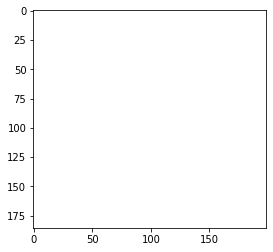

In [11]:
alpha = lucy[:,:,-1] # 알파채널
plt.imshow(alpha, cmap='gray', vmin=0, vmax=1)

In [12]:
lucy[:,:,3].min()

1.0

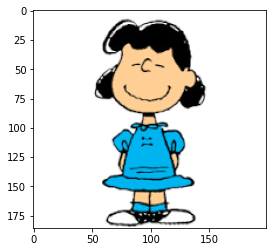

In [13]:
plt.imshow(lucy[:,:,:3])

### 이미지는 숫자
- 0~255 까지의 정수로 표현 (np.uint8)
- 0.0 ~ 1.0 까지의 실수로 표현 (np.float)

In [14]:
# 1000x600x800x3, 30fps

In [15]:
bob[100:110, 100:110, 0]

array([[170, 156, 170, 199, 197, 164, 161, 171, 172, 169],
       [173, 155, 170, 197, 175, 151, 161, 168, 173, 165],
       [179, 157, 171, 194, 162, 149, 168, 167, 175, 166],
       [183, 158, 171, 191, 158, 154, 177, 169, 179, 170],
       [171, 170, 175, 168, 160, 173, 177, 170, 173, 183],
       [169, 166, 173, 167, 168, 167, 168, 175, 181, 177],
       [165, 162, 168, 167, 163, 159, 166, 184, 184, 161],
       [163, 158, 163, 166, 162, 167, 179, 186, 166, 133],
       [163, 156, 160, 168, 180, 187, 185, 167, 137, 114],
       [166, 159, 160, 169, 188, 186, 168, 142, 128, 131]], dtype=uint8)

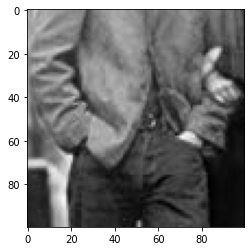

In [16]:
plt.imshow(bob[100:200, 100:200, 0], cmap='gray')

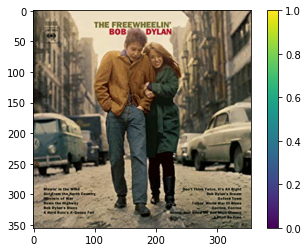

In [17]:
bob2 = bob/255 # 0.0~1.0 으로 변환

plt.imshow(bob2)
plt.colorbar()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


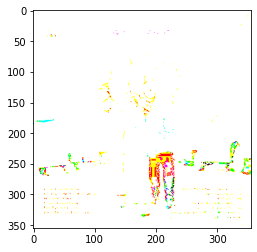

In [18]:
plt.imshow(bob.astype('float'))

### 이미지 히스토그램
- 밝기 영역별 픽셀수 표현

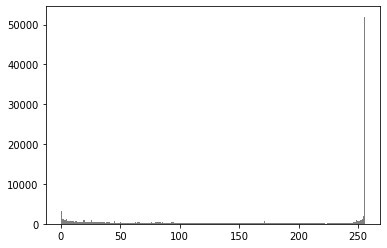

In [19]:
plt.hist(car.ravel(), bins=range(257), color='gray')
pass

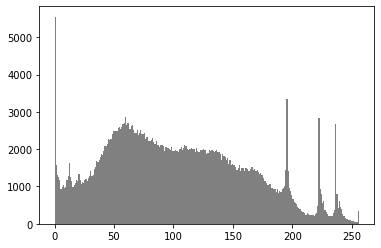

In [20]:
plt.hist(bob.ravel(), bins=range(257), color='gray')
pass

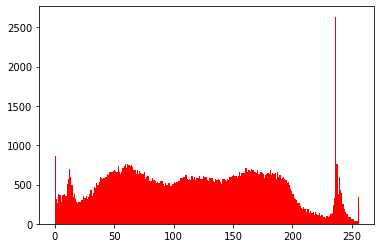

In [21]:
plt.hist(bob[:,:,0].ravel(), bins=range(257), color='red') # R channel
pass

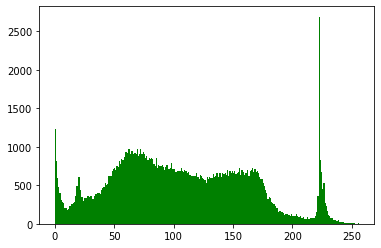

In [22]:
plt.hist(bob[:,:,1].ravel(), bins=range(257), color='green') # G channel
pass

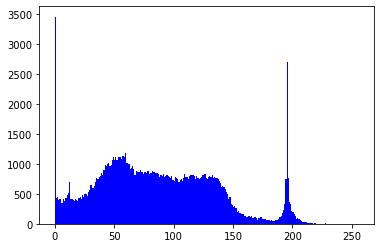

In [23]:
plt.hist(bob[:,:,2].ravel(), bins=range(257), color='blue') # B channel
pass

### 채널 분리

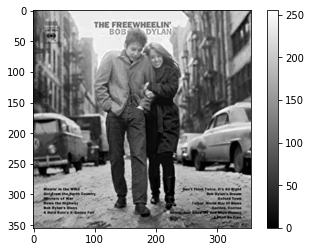

In [24]:
plt.imshow(bob[:,:,0], cmap='gray', vmin=0, vmax=255) # R
plt.colorbar()

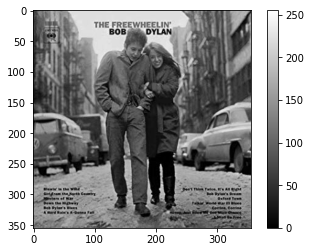

In [25]:
plt.imshow(bob[:,:,1], cmap='gray', vmin=0, vmax=255) # G
plt.colorbar()

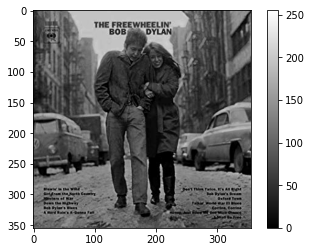

In [26]:
plt.imshow(bob[:,:,2], cmap='gray', vmin=0, vmax=255) # B
plt.colorbar()

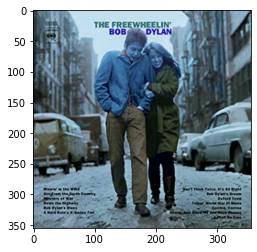

In [27]:
plt.imshow(bob[:,:,[2,1,0]]) # RGB => BGR

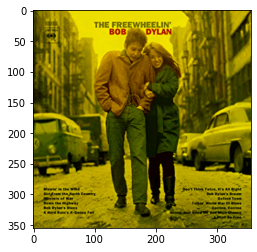

In [28]:
bob2 = bob.copy()
bob2[:,:,2] = 0 # B channel

plt.imshow(bob2)

### 잘라내기

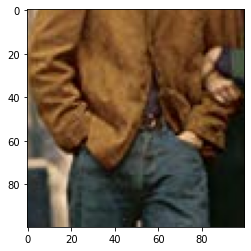

In [29]:
cut = bob[100:200, 100:200]
plt.imshow(cut)

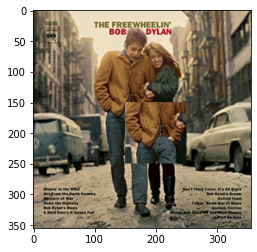

In [30]:
bob2 = bob.copy()
bob2[150:250, 150:250] = cut

plt.imshow(bob2)

### 이미지 저장

In [31]:
plt.imsave('bob2.jpg', bob2)

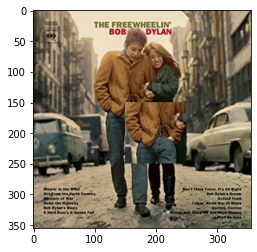

In [32]:
plt.imshow(plt.imread('bob2.jpg'))

### 흑백이미지로 변환

In [33]:
bob2 = bob.mean(axis=2)
bob2.dtype, bob2.max(), bob2.min()

(dtype('float64'), 245.33333333333334, 0.0)

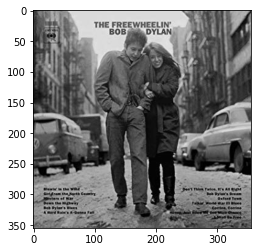

In [34]:
bob2 = bob.mean(axis=2)/255
plt.imshow(bob2, cmap='gray', vmin=0, vmax=1)

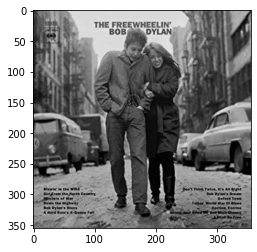

In [35]:
bob2 = bob.mean(axis=2).astype(np.uint8)
plt.imshow(bob2, cmap='gray', vmin=0, vmax=255)

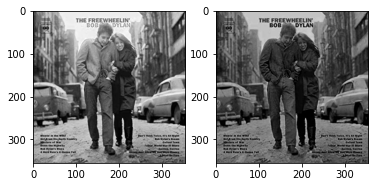

In [36]:
plt.subplot(1,2,1)
bob2 = bob.max(axis=2)
plt.imshow(bob2, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
bob2 = bob.min(axis=2)
plt.imshow(bob2, cmap='gray', vmin=0, vmax=255)

### 필터링

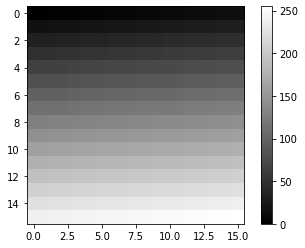

In [37]:
img = np.arange(256).reshape(16,16)
plt.imshow(img, cmap='gray')
plt.colorbar()

In [38]:
filter = np.eye(16)
filter

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

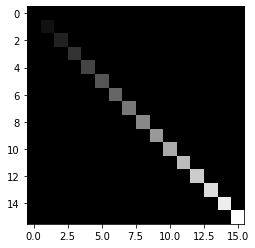

In [39]:
img2 = img*filter
plt.imshow(img2, cmap='gray')

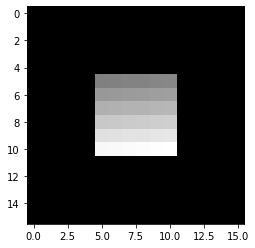

In [40]:
filter = np.zeros([16,16])
filter[5:11, 5:11] = 1

plt.imshow(img*filter, cmap='gray')

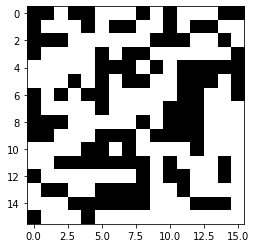

In [41]:
filter = np.random.randint(2, size=[16,16])
plt.imshow(filter, cmap='gray')

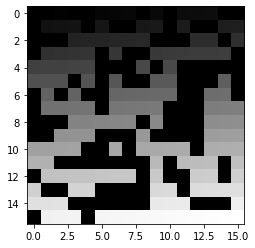

In [42]:
img2 = img*filter
plt.imshow(img2, cmap='gray')

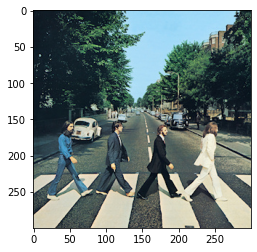

In [43]:
abbey = plt.imread('abbey_road.jpg')

plt.imshow(abbey)

In [44]:
abbey.shape, abbey.dtype, abbey.max(), abbey.min()

((300, 300, 3), dtype('uint8'), 255, 0)

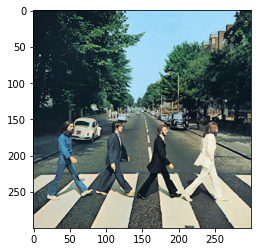

In [45]:
abbey = abbey/255 # 실수로 변환 (0~1)
plt.imshow(abbey)

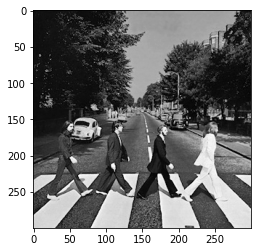

In [46]:
img = abbey[:,:,0] # R channel 분리
plt.imshow(img, cmap='gray', vmin=0, vmax=1)

### Blur
- X 자 필터 적용

In [47]:
filter = np.array([[1,0,1],[0,1,0],[1,0,1]])/5
filter

array([[0.2, 0. , 0.2],
       [0. , 0.2, 0. ],
       [0.2, 0. , 0.2]])

In [48]:
w, h = img.shape
conv = []

for i in range(h-3+1): # 298
    l = []
    
    for j in range(w-3+1): # 298
        r = (img[i:i+3, j:j+3]*filter).sum()
        l.append(r)
        
    conv.append(l)
    
conv = np.array(conv, dtype=float)

In [49]:
conv.shape, conv.max(), conv.min()

((298, 298), 0.9890196078431372, 0.007058823529411765)

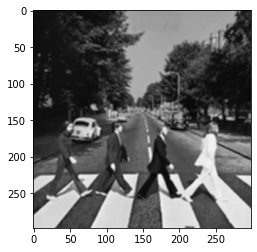

In [50]:
plt.imshow(conv, cmap='gray', vmin=0, vmax=1)

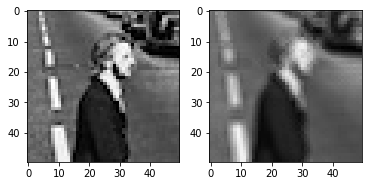

In [51]:
plt.subplot(1,2,1)
plt.imshow(img[150:200, 150:200], cmap='gray', vmin=0, vmax=1)
plt.subplot(1,2,2)
plt.imshow(conv[150:200, 150:200], cmap='gray', vmin=0, vmax=1)

# sharpen
- np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]]) => 외곽선
- np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]]) => 샤프닝

In [52]:
filter = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
filter

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

In [53]:
w, h = img.shape
conv = []

for i in range(h-3+1):
    l = []
    
    for j in range(w-3+1):
        r = (img[i:i+3, j:j+3]*filter).sum()
        l.append(r)
        
    conv.append(l)
    
conv = np.array(conv, dtype=float)

In [54]:
conv.shape, conv.max(), conv.min()

((298, 298), 3.7254901960784306, -5.905882352941177)

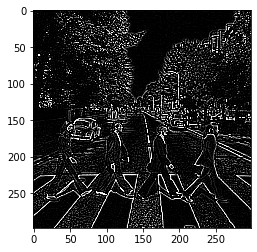

In [55]:
plt.imshow(conv, cmap='gray', vmin=0, vmax=1)

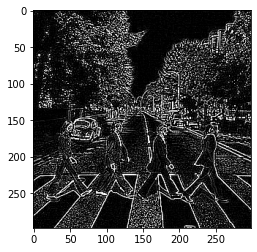

In [56]:
conv2 = conv.copy()
conv2[conv<0] = 0
conv2[conv>1] = 1

plt.imshow(conv2, cmap='gray', vmin=0, vmax=1)

In [57]:
filter = np.array([[-1,-1,-1], [-1,11,-1], [-1,-1,-1]])
filter

array([[-1, -1, -1],
       [-1, 11, -1],
       [-1, -1, -1]])

In [58]:
w, h = img.shape
conv = []

for i in range(h-3+1):
    l = []
    
    for j in range(w-3+1):
        r = (img[i:i+3, j:j+3]*filter).sum()
        l.append(r)
        
    conv.append(l)
    
conv = np.array(conv, dtype=float)

In [59]:
conv.shape, conv.max(), conv.min()

((298, 298), 6.298039215686275, -5.894117647058824)

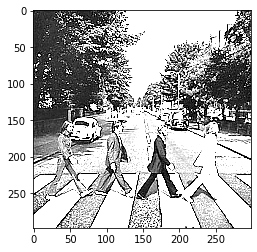

In [60]:
plt.imshow(conv, cmap='gray', vmin=0, vmax=1)

### 기타 효과

In [61]:
filter = np.array([[-2,0,0], [0,1,0], [0,0,2]]) # emboss
filter

array([[-2,  0,  0],
       [ 0,  1,  0],
       [ 0,  0,  2]])

In [62]:
w, h = img.shape
conv = []

for i in range(h-3+1):
    l = []
    
    for j in range(w-3+1):
        r = (img[i:i+3, j:j+3]*filter).sum()
        l.append(r)
        
    conv.append(l)
    
conv = np.array(conv, dtype=float)

In [63]:
conv.shape, conv.max(), conv.min()

((298, 298), 2.9058823529411764, -1.843137254901961)

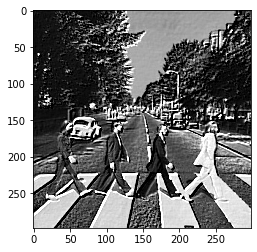

In [64]:
plt.imshow(conv, cmap='gray', vmin=0, vmax=1)

In [65]:
filter = np.array([[-2,1,2], [-2,1,2], [-2,1,2]])/3 # emboss
filter

array([[-0.66666667,  0.33333333,  0.66666667],
       [-0.66666667,  0.33333333,  0.66666667],
       [-0.66666667,  0.33333333,  0.66666667]])

In [66]:
w, h = img.shape
conv = []

for i in range(h-3+1):
    l = []
    
    for j in range(w-3+1):
        r = (img[i:i+3, j:j+3]*filter).sum()
        l.append(r)
        
    conv.append(l)
    
conv = np.array(conv, dtype=float)

In [67]:
conv.shape, conv.max(), conv.min()

((298, 298), 2.794771241830065, -1.5895424836601306)

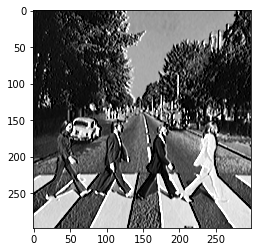

In [68]:
plt.imshow(conv, cmap='gray', vmin=0, vmax=1)

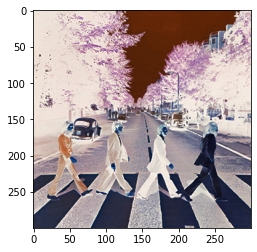

In [69]:
plt.imshow(1-abbey) # 네거티브 필름

### 3차원 필터

In [70]:
a = np.array([[1,0,1],[0,1,0],[1,0,1]])
filter = np.dstack([a,a,a])/15 # 채널을 합친다
filter.shape

(3, 3, 3)

In [71]:
w, h = img.shape
conv = []

for i in range(h-3+1):
    l = []
    
    for j in range(w-3+1):
        r = (img[i:i+3, j:j+3]*filter).sum()
        l.append(r)
        
    conv.append(l)
    
conv = np.array(conv, dtype=float)

In [72]:
conv.shape, conv.max(), conv.min()

((298, 298), 0.9874509803921568, 0.007581699346405228)

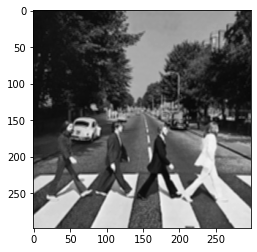

In [73]:
plt.imshow(conv, cmap='gray', vmin=0, vmax=1)

In [74]:
X = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
filter = np.dstack([X, X, X]) # 채널을 합친다
filter.shape

(3, 3, 3)

In [75]:
w, h = img.shape
conv = []

for i in range(h-3+1):
    l = []
    
    for j in range(w-3+1):
        r = (img[i:i+3, j:j+3]*filter).sum()
        l.append(r)
        
    conv.append(l)
    
conv = np.array(conv, dtype=float)

In [76]:
conv.shape, conv.max(), conv.min()

((298, 298), 8.682352941176472, -10.63529411764706)

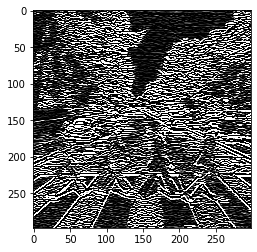

In [77]:
plt.imshow(conv*5, cmap='gray', vmin=0, vmax=1)

### Pooling

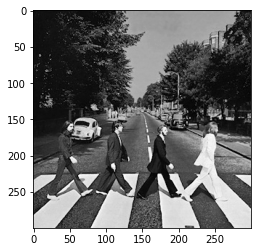

In [78]:
plt.imshow(img, cmap='gray', vmin=0, vmax=1)

In [79]:
img.shape

(300, 300)

In [80]:
# 2x2 격자, Max-pooling
w, h = img.shape
pool = []

for i in range(0,h-1,2):
    l = []
    
    for j in range(0,w-1,2):
        r = img[i:i+2, j:j+2].max()
        l.append(r)
        
    pool.append(l)
    
pool = np.array(pool)

In [81]:
pool.shape

(150, 150)

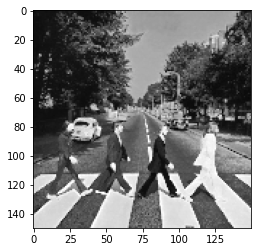

In [82]:
plt.imshow(pool, cmap='gray', vmin=0, vmax=1)

In [83]:
# 3x3 격자, Mean-pooling
w, h = img.shape
pool = []

for i in range(0,h-2,3):
    l = []
    
    for j in range(0,w-2,3):
        r = img[i:i+3, j:j+3].mean()
        l.append(r)
        
    pool.append(l)
    
pool = np.array(pool)

In [84]:
pool.shape

(100, 100)

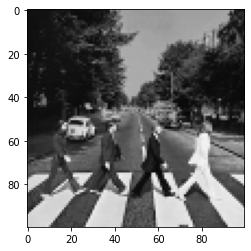

In [85]:
plt.imshow(pool, cmap='gray', vmin=0, vmax=1)

### Convolution(필터) 과 Pooling(사이즈줄이기) 이해하기
- Convolution 을 적용하면 (필터사이즈-1) 만큼 크기가 줄어든다.
- Pooling 을 적용하면 크기가 반으로 줄어든다.
- 필터 사이즈가 3일때, 원본이미지(300X300) => Conv(298X298) => Pool(149X149) => Conv(147X147) => Pool(73X73) => ...
- 300X300 인 이미지에 필터 100개인 Convolution 과 Pooling 을 차례로 적용하면 => 149X149 이미지 100개가 생성된다
> 300X300X3 => 149X149X100
- 이런식으로 변환된 이미지를 신경망과 딥러닝에 적용한다. (원본이미지가 필터와 리사이즈를 통과한 값으로 변환된다.)

In [86]:
import tensorflow as tf
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train.reshape(-1,28,28,1)/255.
X_test = X_test.reshape(-1,28,28,1)/255.

In [87]:
7*7*256

12544

In [88]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), padding='same',
                    activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(256, (3,3), padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 256)       147712    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                125450    
Total params: 273,802
Trainable params: 273,802
Non-trainable params: 0
__________________________________________________

In [89]:
3*3*64*256 + 256

147712